In [51]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import locale
import nltk
import re
import json
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from IPython.display import display
nltk.download("stopwords")
nltk.download("punkt")
locale.setlocale( locale.LC_ALL, 'en_GB.UTF-8') 
plt.rcParams["figure.figsize"] = (16,9)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
stations = pd.read_json("data/police_stations.json", orient='records')
reviews = pd.DataFrame(stations.reviews.sum())
display(reviews.shape)
texts = pd.DataFrame([reviews.text]).T.fillna("")
texts.head()

(48, 15)

,text
0,(Translated by Google) The most chaotic and po...
1,(Translated by Google) Years ago I went with m...
2,(Translated by Google) The only thing I liked ...
3,(Translated by Google) It is unusual for polic...
4,(Translated by Google) The treatment by the po...


In [37]:
reviews.head()

,name,text,publishAt,publishedAtDate,likesCount,reviewId,reviewUrl,reviewerId,reviewerUrl,reviewerNumberOfReviews,isLocalGuide,stars,rating,responseFromOwnerDate,responseFromOwnerText
0,Sergio hjd,(Translated by Google) The most chaotic and po...,2 months ago,2022-02-09T22:12:37.049Z,6,ChZDSUhNMG9nS0VJQ0FnSURtNi1mbFh3EAE,https://www.google.com/maps/reviews/data=!4m5!...,111751099491679627017,https://www.google.com/maps/contrib/1117510994...,3,False,1,None,None,None
1,Mari Carmen Vv,(Translated by Google) Years ago I went with m...,3 weeks ago,2022-04-04T11:58:45.410Z,1,ChdDSUhNMG9nS0VJQ0FnSURXeTgyd213RRAB,https://www.google.com/maps/reviews/data=!4m5!...,117094417873459475834,https://www.google.com/maps/contrib/1170944178...,5,False,2,None,None,None
2,DIEGO GARCÍA,(Translated by Google) The only thing I liked ...,2 months ago,2022-02-25T20:14:15.110Z,1,ChZDSUhNMG9nS0VJQ0FnSUNXNXNiQmZREAE,https://www.google.com/maps/reviews/data=!4m5!...,106288465349563811687,https://www.google.com/maps/contrib/1062884653...,27,False,5,None,None,None
3,C LM,(Translated by Google) It is unusual for polic...,3 months ago,2022-01-21T16:53:07.877Z,3,ChdDSUhNMG9nS0VJQ0FnSURtbkxxRHVnRRAB,https://www.google.com/maps/reviews/data=!4m5!...,101026494626930442159,https://www.google.com/maps/contrib/1010264946...,86,True,1,None,None,None
4,Ainhoa Pazos,(Translated by Google) The treatment by the po...,4 weeks ago,2022-03-27T23:33:18.160Z,0,ChZDSUhNMG9nS0VJQ0FnSURXeVpDblhnEAE,https://www.google.com/maps/reviews/data=!4m5!...,108725323522693437165,https://www.google.com/maps/contrib/1087253235...,12,True,5,None,None,None


In [21]:
texts["n_chars"] = texts["text"].apply(len)

<AxesSubplot:>

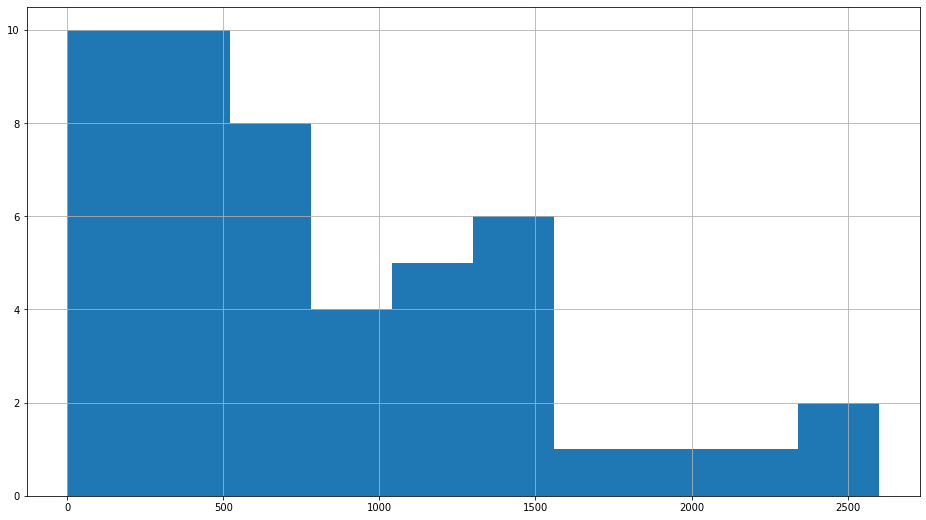

In [22]:
texts["n_chars"].hist()

In [23]:
texts["n_words"] = texts["text"].apply(lambda t: len(re.split(r"\s", t)))

<AxesSubplot:>

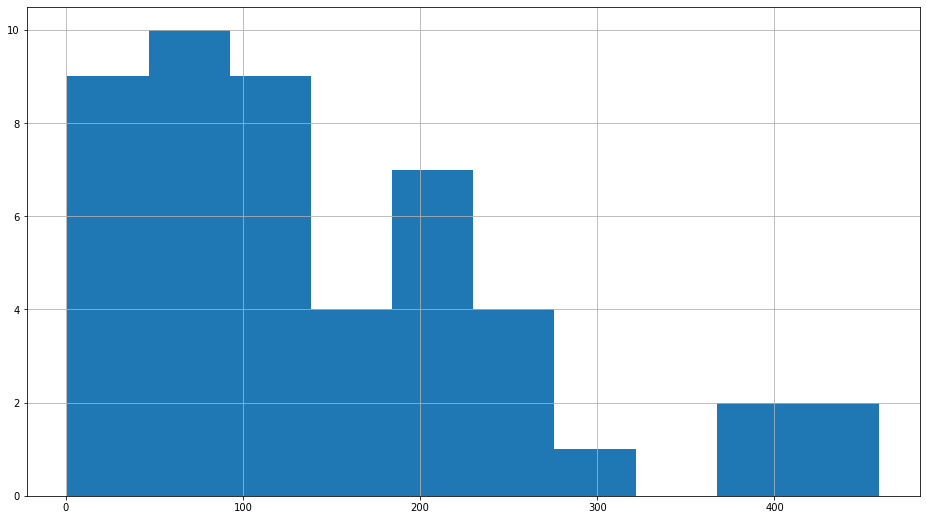

In [24]:
texts["n_words"].hist()

In [25]:
stops = stopwords.words("english")
def tokenize(texts):
    tokens = []
    if type(texts) == str:
        texts = [texts]
    for text in texts:
        if type(text) == str:
            for token in word_tokenize(text):
                if token not in stops and token.isalnum():
                    tokens.append(token.lower())
    return tokens

In [26]:
texts["tokens"] = texts["text"].apply(tokenize)

In [27]:
texts

,text,n_chars,n_words,tokens
0,(Translated by Google) The most chaotic and po...,778,132,"[translated, google, the, chaotic, poorly, man..."
1,(Translated by Google) Years ago I went with m...,1103,198,"[translated, google, years, ago, i, went, lawy..."
2,(Translated by Google) The only thing I liked ...,852,165,"[translated, google, the, thing, i, liked, tre..."
3,(Translated by Google) It is unusual for polic...,651,110,"[translated, google, it, unusual, police, offi..."
4,(Translated by Google) The treatment by the po...,219,37,"[translated, google, the, treatment, police, w..."
5,(Translated by Google) Young and willing staff...,1134,223,"[translated, google, young, willing, staff, th..."
6,(Translated by Google) It is a pity that a pol...,1495,262,"[translated, google, it, pity, police, station..."
7,"(Translated by Google) If you can, do not go t...",813,154,"[translated, google, if, go, police, station, ..."
8,(Translated by Google) Let no one think that t...,2222,396,"[translated, google, let, one, think, national..."
9,"(Translated by Google) For me, without a but. ...",1294,224,"[translated, google, for, without, it, took, c..."


In [28]:
vectorizer =  CountVectorizer(stop_words='english')
counts = vectorizer.fit_transform(texts.text.values)
counts_normalized_for_length = counts / texts.n_words.values[:,None]

In [29]:
average = np.array(counts_normalized_for_length.sum(axis=0) / counts_normalized_for_length.shape[0]).reshape(-1)

In [30]:
distances = []
for i in range(0, counts.shape[0]):
    row = counts_normalized_for_length[i,:].reshape(-1)
    distances.append(sp.spatial.distance.cosine(average, row))

/Users/tim/src/excesos-extrasensoriales/analisis/venv/lib/python3.10/site-packages/scipy/spatial/distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [31]:
texts["distance_to_mean_normalized"] = distances

In [32]:
for (_, row) in texts.sort_values("distance_to_mean_normalized").head(10).iterrows():
    print(row.text)
    print("----")


----
Heroes
----
(Translated by Google) Let no one think that the National Police is going to help you at some point. If they seem friendly to you, it is because in their routine as an official working 0,0, they want to distract themselves a bit, knowing that your complaint is not going to go anywhere.
Those at the door are rude, cocky, arrogant and arrogant whose sole mission is to prevent you from entering the Police Station... ALWAYS WITH THE MANTRA THAT THERE ARE A LOT OF PEOPLE OR THAT THEY HAVE ARRESTED... WHETHER THERE ARE PEOPLE OR NOT, THEY MAKE YOU WAIT TWO HOURS.
I am horrified at how in places without crime like (Segovia or Soria) they strut around the city and its surroundings at all hours, giving the feeling of a militarized place.
There is no air of freedom with so many Police and Civil Guard.
They should be confined in their barracks and only act at the request of the citizen, when they are called and required for some service...
I find it outrageous the case of a revi

In [34]:
for (_, row) in texts.sort_values("distance_to_mean_normalized", ascending=False).head(20).iterrows():
    print(row.text)
    print("----")

No step free and the main room is in the second floor.
There is a photo place in front of it if you need a last minute photo taken.
From my experience the 2 people that took our docs were not extremely helpful taking in consideration we were there to renew children documents and you have to get 1 appointment per document per child and you can only get 2 per parent, the person doing them instead of: "I need both of you here so I'll do both" was "I'll do just the one I have and you need to sort out the other", thankfully someone thought that if the needed both our documents and signatures it will make sense to sit in desks next to each other instead of in opposite sides of the room.
----
First of one, get one number for waiting, and it is gonna be waiting for 2 or 3 hours!!!!!!!!!! So you could get the number first then go get a coffee or whatever you wanna do. Anyway , have a good luck, hope all of you will get your things back.
----
I do not understand why these people are recognized a

In [154]:
vectorizer.inverse_transform((average >= 0.0
                        1).astype(int).reshape(1, -1))

[array([], dtype='<U18')]

In [55]:
counter = Counter()
tokenized_json = []
for (_, row) in texts.iterrows():
    counter.update(row.tokens)

for (_, row) in texts.iterrows():
    text = []
    for token in row["tokens"]:
        text.append({
            "word": token,
            "weight": 1.0 / counter[token]
        })
    tokenized_json.append(text)
with open("data/tokenized_police_stations.json", "w") as f:
    json.dump(tokenized_json, f)

In [56]:
tfidf

TfidfVectorizer(stop_words='english')

In [67]:
spanish_texts = pd.DataFrame({ "text": texts[texts.text.str.contains("Translated by Google")].text.str.split("\(Original\)").apply( lambda x: x[1].strip()) })

In [71]:
counter = Counter()
tokenized_json = []
for (_, row) in spanish_texts.iterrows():
    tokens = [word.lower() for word in word_tokenize(row.text)]
    counter.update(tokens)

for (_, row) in spanish_texts.iterrows():
    text = []
    tokens = [word.lower() for word in word_tokenize(row.text)]
    for token in tokens:
        text.append({
            "word": token,
            "weight": 1.0 / counter[token]
        })
    tokenized_json.append(text)
with open("data/tokenized_police_stations_spanish.json", "w") as f:
    json.dump(tokenized_json, f)

In [76]:
english_texts = pd.DataFrame({ "text": 
    texts[
        texts.text.str.contains("Translated by Google")
    ].text.str.split("\(Original\)").apply( lambda x: x[0].replace("(Translated by Google)", "").strip()) })

In [79]:
counter = Counter()
tokenized_json = []
for (_, row) in english_texts.iterrows():
    tokens = [word.lower() for word in word_tokenize(row.text)]
    counter.update(tokens)

for (_, row) in english_texts.iterrows():
    text = []
    tokens = [word.lower() for word in word_tokenize(row.text)]
    for token in tokens:
        text.append({
            "word": token,
            "weight": 1.0 / counter[token]
        })
    tokenized_json.append(text)
with open("data/tokenized_police_stations_english.json", "w") as f:
    json.dump(tokenized_json, f)